# Helping Python Script - Magnetic

### This Python script is only for inspriation, and you would need to change the parameters, load the a proper dataset, and do your own processing for it to be correct.

### For this script I use the module chaosmagpy

In [1]:
#%% Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import the chaosmagpy module
from chaosmagpy.model_utils import design_gauss, synth_values

In [2]:
# how to load data

# load IGRF model parameters
m = np.loadtxt('MAGNETIK/IGRF13-2020.txt')

# load SWARM data with pandas
swarm = pd.read_csv("MAGNETIK/SWARM_data.csv")
swarm.columns = ['theta', 'phi', 'radius', 'Bt', 'Bp', 'Br']

In [3]:
# how to call columns:
swarm.theta

0       18.158019
1       17.519825
2       16.882169
3       16.245114
4       15.608735
          ...    
1115    20.200215
1116    19.560650
1117    18.921467
1118    18.282708
1119    17.644421
Name: theta, Length: 1120, dtype: float64

In [4]:
# simple example

# locations
r = 6371.2
theta = np.array([90., 100., 110., 120.])
phi = 0.
nmax = 13

# calculate A_radius, A_theta, A_phi
A_radius, A_theta, A_phi = design_gauss(r, theta, phi, nmax=nmax)

# calculate magnetic components (Br, Bt, Bp) with model parameter (m)
Br = A_radius @ m
Bt = A_theta @ m
Bp = A_phi @ m

Text(0.5, 0, 'SWARM datapoints')

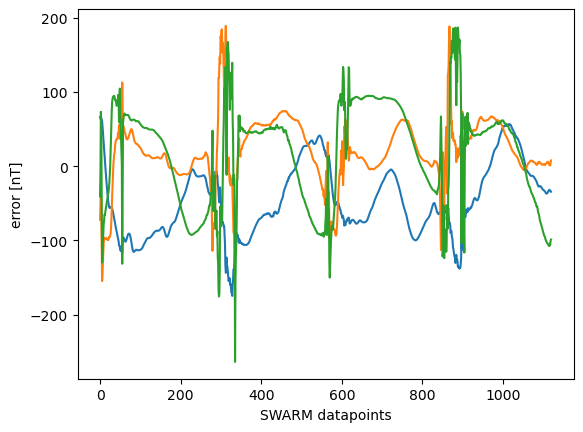

In [5]:
# compute the magnetic components directly from the coefficients
Br_pred, Bt_pred, Bp_pred = synth_values(m, swarm.radius/1000, swarm.theta, swarm.phi)

Br_error = swarm.Br - Br_pred
Bt_error = swarm.Bt - Bt_pred
Bp_error = swarm.Bp - Bp_pred

plt.figure()
plt.plot(Br_error)
plt.plot(Bt_error)
plt.plot(Bp_error)
plt.ylabel('error [nT]')
plt.xlabel('SWARM datapoints')